In [ ]:
from keras.layers import Conv2D , MaxPooling2D , Dense , Dropout , Flatten
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import backend

In [ ]:
(xtrain , ytrain ), (xtest , ytest) = mnist.load_data()

In [ ]:
#channel first and channel last
if backend.image_data_format() == 'channels_first':
  xtrain = xtrain.reshape(xtrain.shape[0] , 1 , xtrain.shape[1] , xtrain.shape[2])
  xtest = xtest.reshape(xtest.shape[0] , 1 , xtest.shape[1] , xtest.shape[2])
  input_shape = (1 , xtrain.shape[1] , xtrain.shape[2])
else:
  xtrain = xtrain.reshape(xtrain.shape[0] ,  xtrain.shape[1] , xtrain.shape[2] , 1)
  xtest = xtest.reshape(xtest.shape[0] ,  xtest.shape[1] , xtest.shape[2] , 1)
  input_shape = (xtrain.shape[1] , xtrain.shape[2] , 1)

In [ ]:
# to categorical
ytrain = to_categorical(ytrain , num_classes=10)
ytest = to_categorical(ytest , num_classes=10)

In [ ]:
# normalization
xtrain = (xtrain - xtrain.min())/(xtrain.max() - xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max() - xtest.min())
print(xtrain.min())
print(xtrain.max())

0.0
1.0


In [ ]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64 , kernel_size=(3,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es = EarlyStopping(monitor='val_loss' , mode='auto' , verbose=1)

In [ ]:
model.compile(keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
output_fit = model.fit(xtrain , ytrain , epochs=10 , batch_size=128,
                       validation_split=0.2 , callbacks=[es])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.8745 - loss: 0.3847 - val_accuracy: 0.9820 - val_loss: 0.0586
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 105ms/step - accuracy: 0.9736 - loss: 0.0843 - val_accuracy: 0.9843 - val_loss: 0.0505
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.9742 - loss: 0.0816 - val_accuracy: 0.9842 - val_loss: 0.0504
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9767 - loss: 0.0735 - val_accuracy: 0.9871 - val_loss: 0.0454
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - accuracy: 0.9785 - loss: 0.0695 - val_accuracy: 0.9879 - val_loss: 0.0413
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.9797 - loss: 0.0644 - val_accuracy: 0.9893 - val_loss: 0.0391
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9808 - loss: 0.0618 - val_accuracy: 0.9875 - val_loss: 0.0438
Epoch 7: early stopping


In [ ]:
print(output_fit.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


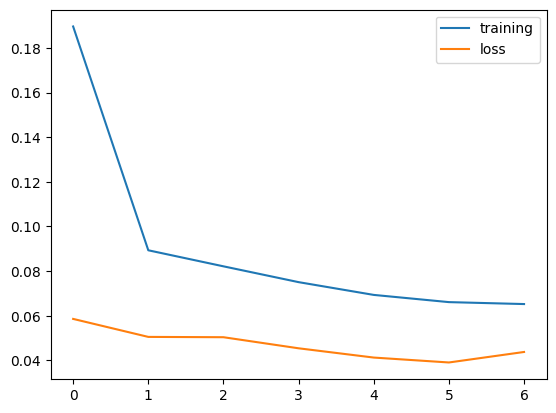

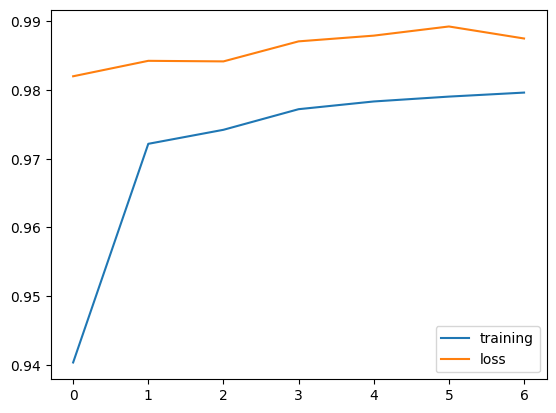

In [ ]:
plt.plot(output_fit.history['loss'])
plt.plot(output_fit.history['val_loss'])
plt.legend(['training' , 'val'])
plt.show()

plt.plot(output_fit.history['accuracy'])
plt.plot(output_fit.history['val_accuracy'])
plt.legend(['training' , 'loss'])
plt.show()

In [ ]:
output_predict= model.predict(xtest, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [ ]:
print(output_predict)

[[1.6997799e-10 7.6228232e-11 2.5231000e-07 ... 9.9999386e-01
  2.6256886e-11 5.3538077e-08]
 [6.8353461e-07 1.6500676e-06 9.9999624e-01 ... 1.4025624e-11
  3.0439068e-08 1.3795805e-11]
 [2.0145153e-06 9.9947685e-01 1.7204617e-05 ... 1.2147882e-04
  3.4953282e-05 2.2644533e-06]
 ...
 [1.7302926e-14 2.5545419e-09 1.1917975e-11 ... 1.4625526e-09
  1.2267070e-07 4.5437449e-08]
 [6.1393308e-09 2.2589704e-15 5.9507863e-12 ... 2.8989745e-13
  5.3681015e-06 7.4810685e-10]
 [6.9499655e-09 1.9970091e-10 2.6740479e-06 ... 3.2680913e-14
  3.5399507e-06 6.7442074e-10]]


In [ ]:
predicted_classes = np.argmax(model.predict(xtest, batch_size=64), axis=-1)
print(ytrain[0:20])
print(predicted_classes[0:20])

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
output_evaluate = model.evaluate(xtest , ytest , batch_size=128)
print(output_evaluate)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9831 - loss: 0.0524
[0.0421961285173893, 0.9865999817848206]
